# Linear Regression

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline
os.getcwd()

'/Users/Edureka/Python'

## Import Dataset

In [2]:
insurance=pd.read_csv('../insurance.csv')

## EDA

In [3]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance.sample(5)

,age,sex,bmi,children,smoker,region,charges
601,51,male,31.635,0,no,northwest,9174.13565
1022,47,male,36.080,1,yes,southeast,42211.13820
54,40,female,28.690,3,no,northwest,8059.67910
1127,35,female,35.860,2,no,southeast,5836.52040
1239,25,female,42.130,1,no,southeast,3238.43570


In [5]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


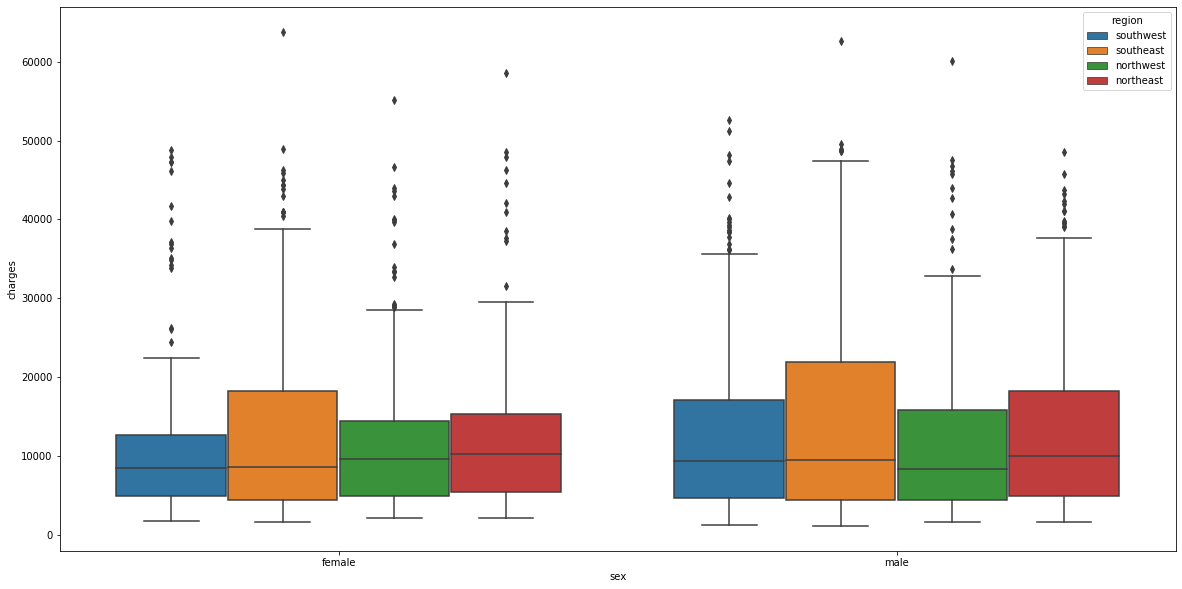

In [6]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='sex',y='charges',hue='region',data=insurance)

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

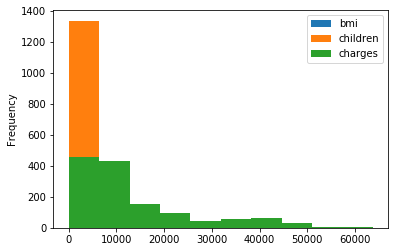

In [8]:
insurance.plot('age',kind='hist')

## Convert categorical Variables to numeric

## Using Get Dummies method

In [9]:
processed_data=pd.get_dummies(insurance)
processed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 12 columns):
age                 1338 non-null int64
bmi                 1338 non-null float64
children            1338 non-null int64
charges             1338 non-null float64
sex_female          1338 non-null uint8
sex_male            1338 non-null uint8
smoker_no           1338 non-null uint8
smoker_yes          1338 non-null uint8
region_northeast    1338 non-null uint8
region_northwest    1338 non-null uint8
region_southeast    1338 non-null uint8
region_southwest    1338 non-null uint8
dtypes: float64(2), int64(2), uint8(8)
memory usage: 52.4 KB


In [10]:
processed_data.sample(6)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1009,51,27.740,1,9957.72160,0,1,1,0,1,0,0,0
436,22,31.730,0,2254.79670,0,1,1,0,1,0,0,0
282,30,27.645,1,4237.12655,0,1,1,0,1,0,0,0
151,48,29.700,0,7789.63500,0,1,1,0,0,0,1,0
401,47,47.520,1,8083.91980,0,1,1,0,0,0,1,0
132,53,35.900,2,11163.56800,1,0,1,0,0,0,0,1


## Using Label Encoder

In [11]:
le=LabelEncoder()

In [12]:
insurance.columns
insurance.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
categorical=[c for c in insurance.columns if insurance.dtypes[c]=='object']
continous=[c for c in insurance.columns if insurance.dtypes[c]!='object']
print(categorical)
print(continous)

print(insurance[categorical[2]])

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']
0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object


In [14]:
le_sex=LabelEncoder()
le_smoker=LabelEncoder()
le_region=LabelEncoder()
insurance[categorical[0]]=le_sex.fit_transform(insurance[categorical[0]])
insurance[categorical[1]]=le_smoker.fit_transform(insurance[categorical[1]])
insurance[categorical[2]]=le_region.fit_transform(insurance[categorical[2]])


In [15]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [16]:
insurance.sample(4)

,age,sex,bmi,children,smoker,region,charges
1328,23,0,24.225,2,0,0,22395.74424
1261,28,1,37.100,1,0,3,3277.16100
53,36,1,34.430,0,1,2,37742.57570
627,33,1,42.460,1,0,2,11326.71487


In [23]:
se=StandardScaler()
df=se.fit_transform(insurance)
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [104]:
y=insurance['charges']
x=insurance.drop('charges',axis=1)

In [105]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

In [106]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((936, 6), (936,), (402, 6), (402,))

In [107]:
xtrain=se.fit_transform(xtrain)
#ytrain=se.fit_transform(ytrain)
xtest=se.fit_transform(xtest)
#ytest=se.fit_transform(ytest)

In [108]:
lm=LinearRegression()
regressor=lm.fit(xtrain,ytrain)

In [109]:
regressor.score(xtrain,ytrain)

0.7468954747900357

In [110]:
result=regressor.predict(xtest)

In [149]:
df_result=pd.DataFrame({'Actual':ytest,'Predicted':result})
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int64
region      1338 non-null int64
charges     1338 non-null float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


936

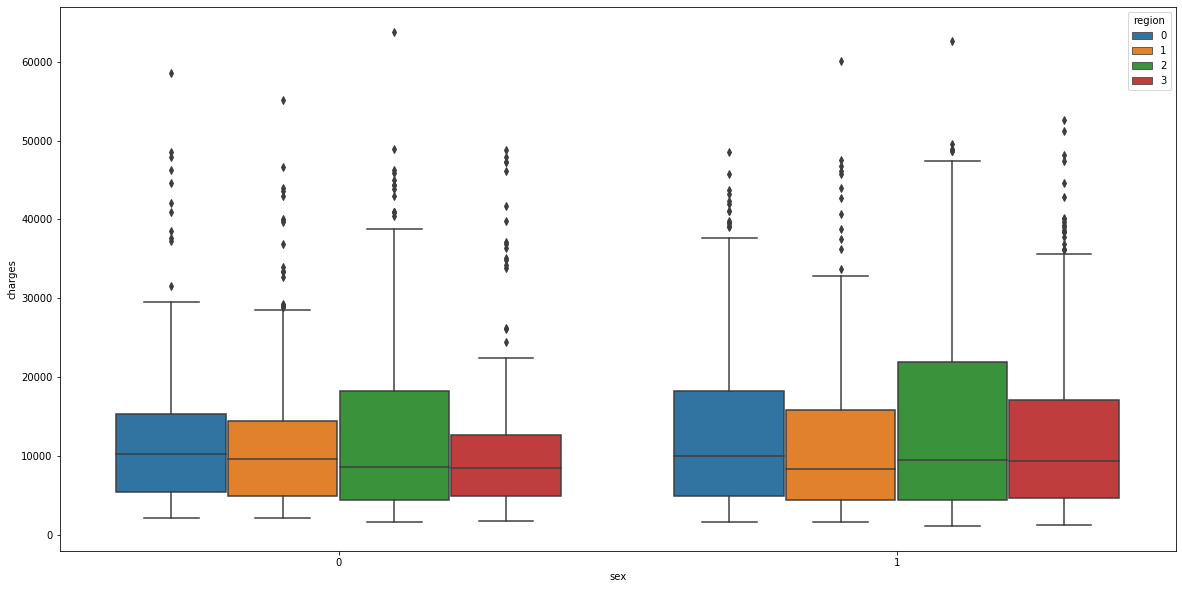

In [172]:
#sns.boxplot(xtrain)
fig=plt.figure(figsize=(20,10))
sns.boxplot(x='sex',y='charges',hue='region',data=insurance)

len(xtrain[:,5])


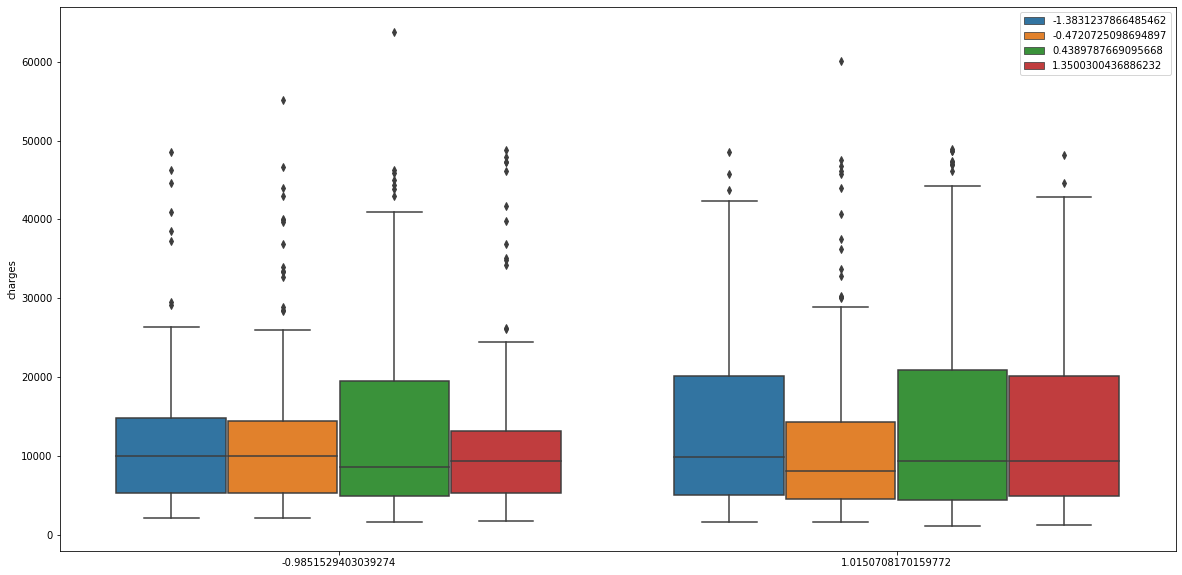

In [174]:
fig=plt.figure(figsize=(20,10))
sns.boxplot(x=xtrain[:,1],y=ytrain,hue=xtrain[:,5],orient='v')


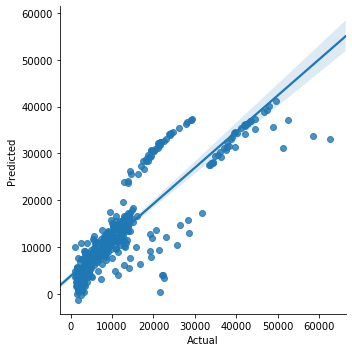

In [114]:
sns.lmplot('Actual','Predicted',data=df_result)

In [115]:
mse=mean_squared_error(ytest,result)
np.sqrt(mse)

5909.971630217125

In [116]:
xtr,xts,ytr,yts=train_test_split(x,y,test_size=0.3,random_state=9)

In [117]:
model2=lm.fit(xtr,ytr)

In [118]:
model2.score(xtr,ytr)

0.7501616089597438

In [119]:
slope=model2.coef_
intercept=model2.intercept_
print(slope)
print(intercept)

[  258.29528965  -243.44307623   319.55564997   451.02130851
 23716.37613996  -320.58081759]
-11415.019053742868


In [120]:
mse2=mean_squared_error(ytest,pred2)
np.sqrt(mse2)

28810.182629526706

In [121]:
df_result2=pd.DataFrame({'Actual':ytest,'Predicted':pred2})

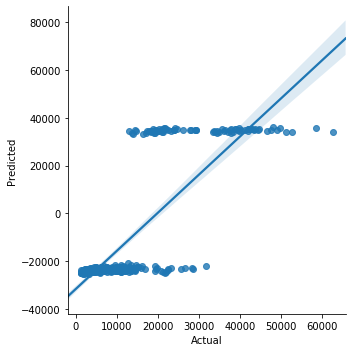

In [140]:
lm=sns.lmplot('Actual','Predicted',data=df_result2,sharex=False,sharey=False)
ax=lm.axes
#ax[0,0].set_xlim(1,)
#ax[0,0].set_ylim(1,)

In [134]:
ax=lm.axes
ax[0,0].set_xlim(0,)
#ax.set_ylim(0,)
ax[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12de4b290>],
      dtype=object)

In [123]:
df_result2[df_result2.Predicted<0]

,Actual,Predicted
471,2203.47185,-23674.306865
1257,11305.93455,-23070.978968
139,2166.73200,-24154.526427
919,5245.22690,-23353.454230
691,8068.18500,-23809.936201
...,...,...
351,8932.08400,-24197.818005
1192,13019.16105,-22465.692666
950,11534.87265,-24081.531066
399,1631.66830,-23826.466903
